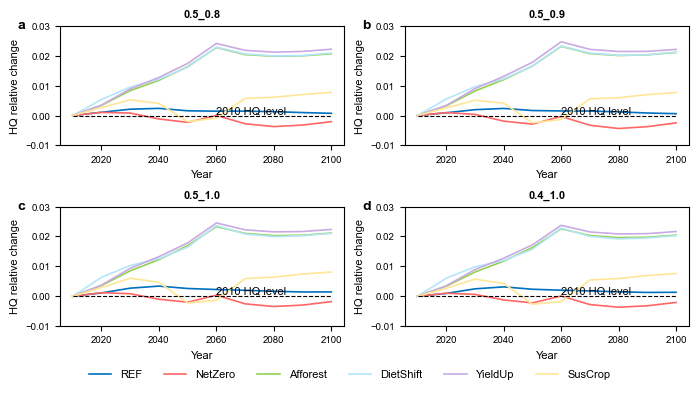

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
# 自定义颜色
colors = [
    "#0070C0", "#FF6666", "#92D050",
    "#B4E6FA", "#C9AAE3", "#FFE696"
]

# 设置全局字体大小
plt.rcParams.update({'font.size': 7})

# Excel 文件与 sheet 列表
file_path = '/Volumes/UCL/论文工作/forestation/my_output_folder/habitatquality_mean_scores0.5_1.0.xlsx'
sheet_names = ['0.5_0.8','0.5_0.9', '0.5_1.0', '0.4_1.0']

# 图像布局
fig = plt.figure(figsize=(7, 3.72))
gs = gridspec.GridSpec(2, 2, figure=fig)
axes = [fig.add_subplot(gs[i // 2, i % 2]) for i in range(4)]

# 绘图
lines = []
labels = []
subplot_labels = ['a', 'b', 'c', 'd']

for idx, (sheet, ax) in enumerate(zip(sheet_names, axes)):

    df = pd.read_excel(file_path, sheet_name=sheet)
    df.set_index(df.columns[0], inplace=True)
    df.columns = df.columns.astype(str)
    x = df.columns.astype(int)

    for i, scenario in enumerate(df.index):
        line, = ax.plot(x, df.loc[scenario], label=scenario, color=colors[i], linewidth=1.2)
        if idx == 0:
            lines.append(line)
            labels.append(scenario)

    ax.set_title(f"{sheet}", fontsize=8, fontweight='bold')
    ax.set_ylabel("HQ relative change", fontsize=8)
    ax.set_xlabel("Year", fontsize=8)
    ax.set_ylim(-0.01, 0.03)
    ax.set_yticks([-0.01, 0, 0.01, 0.02, 0.03])
    # 添加子图标签（如 'a', 'b'）
    ax.text(
        -0.15, 1.05,
        f"{subplot_labels[idx]}",
        transform=ax.transAxes,
        fontsize=10,
        fontweight='bold',
        va='top', ha='left'
    )
    ax.plot(x, [0]*len(x), linestyle='--', color='black', linewidth=0.8) 
    ax.text(
           2060, 0,                          # 位置：X=2080，Y略高于2.5
           "2010 HQ level",              # 标注内容
           fontsize=8, color='black',        # 字体大小与颜色
           ha='left', va='bottom'              # 左对齐，底部对齐
        )

    
# 添加统一图例
fig.legend(
    lines,
    labels,
    loc='lower center',
    ncol=6,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05),
    fontsize=8
)

# 紧凑布局
plt.tight_layout()
plt.savefig('/Volumes/UCL/论文工作/forestation/my_output_folder/plots/S4_/k_in.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

